In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/scrubbed.csv",parse_dates=["datetime"],low_memory=False)
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
# explicitly parsing datetime
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
print(df["datetime"].dtype)

datetime64[ns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              79638 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 6.7+ MB


In [5]:
df.isna().sum()

datetime                 694
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [6]:
(df["country"].isna().sum()/df.size)*100

np.float64(1.0943221992368035)

# let's predict the country where there might be future sightings

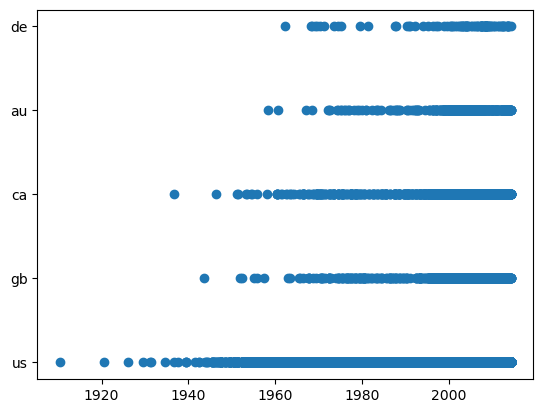

In [8]:
fig,ax=plt.subplots()
df_clean=df.dropna(subset=["country"])
ax.scatter(df_clean["datetime"],df_clean["country"])

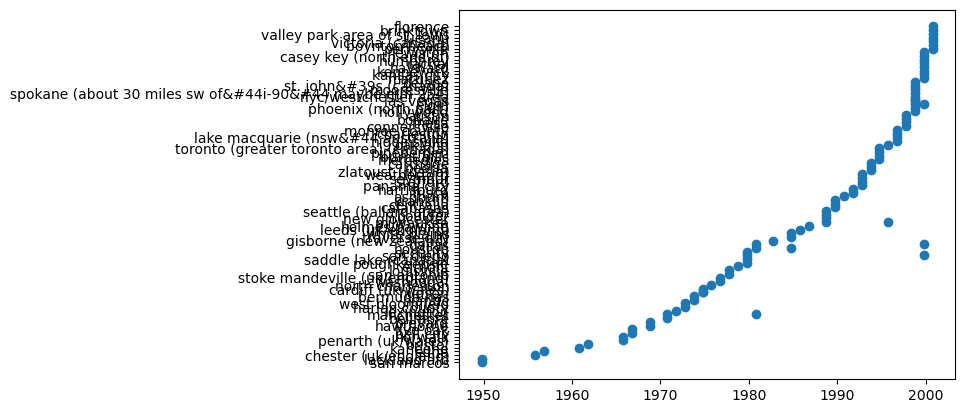

In [14]:
fig,ax=plt.subplots()
ax.scatter(df["datetime"][:100],df["city"][:100])

In [15]:
df.isna().sum()

datetime                 694
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [16]:
# droping the cols that has no attribute
df=df.dropna(subset=["datetime"])
df.isna().sum()

datetime                   0
city                       0
state                   5686
country                 9533
shape                   1891
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              79638 non-null  datetime64[ns]
 1   city                  79638 non-null  object        
 2   state                 73952 non-null  object        
 3   country               70105 non-null  object        
 4   shape                 77747 non-null  object        
 5   duration (seconds)    79638 non-null  object        
 6   duration (hours/min)  79638 non-null  object        
 7   comments              79623 non-null  object        
 8   date posted           79638 non-null  object        
 9   latitude              79638 non-null  object        
 10  longitude             79638 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 7.3+ MB


In [24]:
# sorting according to date
df = df.sort_values(by=["datetime"], ascending=True)
# converting latitude into float
# one col has mistyped 'q' inplace of '.', fix this


# df["latitude"]=df["latitude"].astype(float)
# df.info()

TypeError: Series.sort_values() got an unexpected keyword argument 'by'